## Keras

In [1]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. Getting started : Dataset

In [2]:
#Model configuration:
img_width, img_height = 28,28
batch_size = 32
train_dir = '../dataset/complete_dataset'

In [3]:
#Clas attribute names of the dataset:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [4]:
#Lets take a look at the complete ds
complete_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode="grayscale",
    seed=123,
    validation_split=.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 12503 files belonging to 26 classes.
Using 10003 files for training.


#### We now divide the ds into training and validation

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=.2,rescale=1/255)
train_gen = datagen.flow_from_directory(train_dir,
                                        color_mode="grayscale",
                                        target_size=(img_height, img_width),
                                        subset = "training"
                                       )
val_gen = datagen.flow_from_directory(train_dir,
                                        color_mode="grayscale",
                                        target_size=(img_height, img_width),
                                        subset = "validation"
                                       )

Found 10009 images belonging to 26 classes.
Found 2494 images belonging to 26 classes.


### 2. Visualizing the data

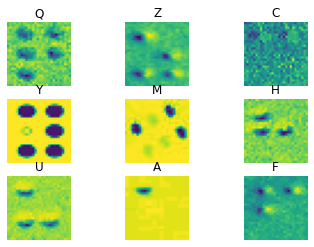

In [6]:
for images, labels in complete_ds.take(1):
    for i in range(9): #Here we are displaying the first 9 images of the dataset
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

In [7]:
for image_batch, labels_batch in complete_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
#The size of my images are 28x28, and the batch size is 32
#The 1 reffers to the colour channels, its greyscale, therefor 1 channel

(32, 28, 28, 1)
(32,)


### 3. Train the model

In [8]:
import tensorflow
from keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

I've used sequental as the format to build my model on, as its the most commonly used

In [9]:
complete_ds

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int32)>

In [10]:
num_classes = 26

model = tf.keras.Sequential([
    
    #CONV LAYER1
    layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)), #Conv2D(filters, kernel_size,...
    #layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,3)), #ES lo mismo poner 1 o 3 channels, 3 channels repetidos el primero
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    
    #CONV LAYER2
    layers.Conv2D(32, 3, activation='relu', padding='same',activity_regularizer=l2(0.02)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    
    #CONV LAYER3
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    
    #CONV LAYER4
    layers.Conv2D(128, 3, activation='relu', padding='same',activity_regularizer=l2(0.03)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    
    #1 FULLY CONNECTED LAYERS
    layers.Flatten(),
    layers.Dense(128, kernel_regularizer=l2(0.007)),
    layers.Dense(num_classes, activation='softmax')
])



In [11]:
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'])

In [12]:
#Train the model
history = model.fit(
    train_gen,
    validation_data = val_gen,
    epochs = 60
)

Epoch 1/60
313/313 [==============================] - 6s 21ms/step - loss: 5.5845 - accuracy: 0.0434 - val_loss: 3.7633 - val_accuracy: 0.0385
Epoch 2/60
313/313 [==============================] - 6s 19ms/step - loss: 3.6008 - accuracy: 0.0656 - val_loss: 3.5896 - val_accuracy: 0.0621
Epoch 3/60
313/313 [==============================] - 6s 19ms/step - loss: 3.0047 - accuracy: 0.1945 - val_loss: 2.6275 - val_accuracy: 0.3737
Epoch 4/60
313/313 [==============================] - 5s 16ms/step - loss: 2.2074 - accuracy: 0.4274 - val_loss: 2.3009 - val_accuracy: 0.3962
Epoch 5/60
313/313 [==============================] - 5s 16ms/step - loss: 1.9222 - accuracy: 0.4992 - val_loss: 2.1379 - val_accuracy: 0.4567
Epoch 6/60
313/313 [==============================] - 5s 16ms/step - loss: 1.6943 - accuracy: 0.5672 - val_loss: 2.3229 - val_accuracy: 0.4318
Epoch 7/60
313/313 [==============================] - 5s 16ms/step - loss: 1.5436 - accuracy: 0.6160 - val_loss: 1.9892 - val_accuracy: 0.4755

Epoch 58/60
313/313 [==============================] - 6s 20ms/step - loss: 0.7464 - accuracy: 0.8065 - val_loss: 1.3783 - val_accuracy: 0.6997
Epoch 59/60
313/313 [==============================] - 7s 22ms/step - loss: 0.7507 - accuracy: 0.8061 - val_loss: 1.2621 - val_accuracy: 0.7025
Epoch 60/60
313/313 [==============================] - 7s 23ms/step - loss: 0.7534 - accuracy: 0.8054 - val_loss: 1.3544 - val_accuracy: 0.6945


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0

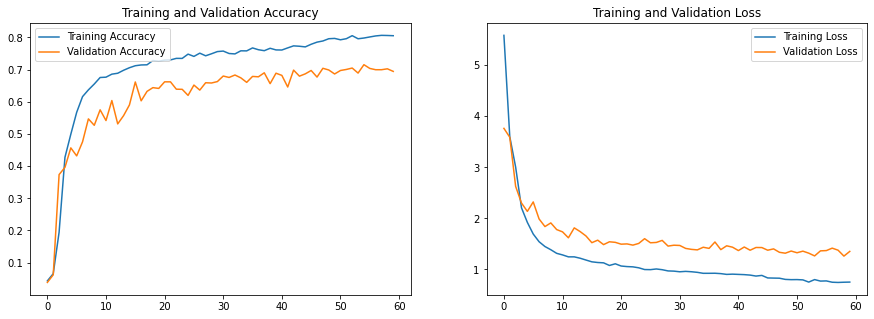

In [14]:
#Visualize training results:
epochs= 60

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [89]:
#To save the model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
